In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
efficiency = pd.read_csv('car_fuel_efficiency.csv')
efficiency = efficiency[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
efficiency.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


No long tail

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

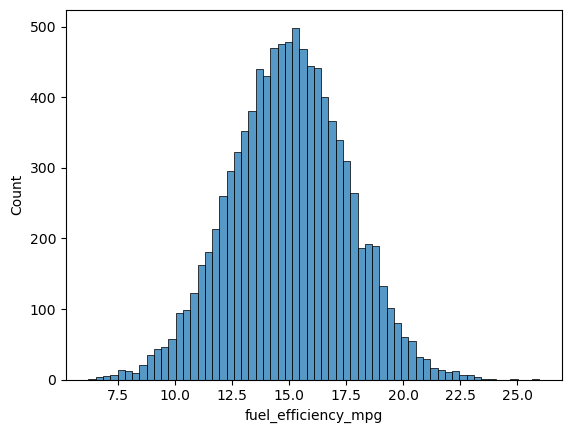

In [3]:
sns.histplot(efficiency.fuel_efficiency_mpg)

Question 1. 

In [4]:
efficiency.isnull().sum()
# horsepower (708 null values)

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Question 2. 

In [5]:
efficiency.horsepower.median()
# 149

149.0

Prepare and Split Dataset

In [6]:
n = len(efficiency)

n_val = int(n * 0.2) # number should be whole number(int)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_test, n_train, n_val

(1940, 5824, 1940)

In [7]:
#now to shuffle the data
#range of numbers from index and shuffles them, 
# so each set is representative of the whole 
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [8]:
df_train = efficiency.iloc[idx[:n_train]]
df_val = efficiency.iloc[idx[n_train:n_train+n_val]]
df_test = efficiency.iloc[idx[n_train+n_val:]]

In [9]:
# show's each has the same length
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [10]:
# reset indices, so they are consequential
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [12]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [13]:
len(y_train), len(y_val), len(y_test)

(5824, 1940, 1940)

Question 3a - fillna(0)

In [14]:
X = [df_train] # list of lists
X = np.array(X)

In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [16]:
efficiency.model_year.max()


2023

In [17]:
efficiency.head(5)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [18]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight']
df_train['age'] = 2023 - df_train['model_year']
features = base + ['age']
X_train = df_train[features].values
X_train = df_train[features].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
y_pred

array([17.33526223, 16.29296317, 17.69885099, ..., 17.54541307,
       18.78287539, 17.86564842], shape=(5824,))

In [19]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2 # finding difference of squared values 
    mse = se.mean() # finding the average difference of squared values
    return np.sqrt(mse) #returns the square root of the average 
# differnce of the squared values

<Axes: ylabel='Count'>

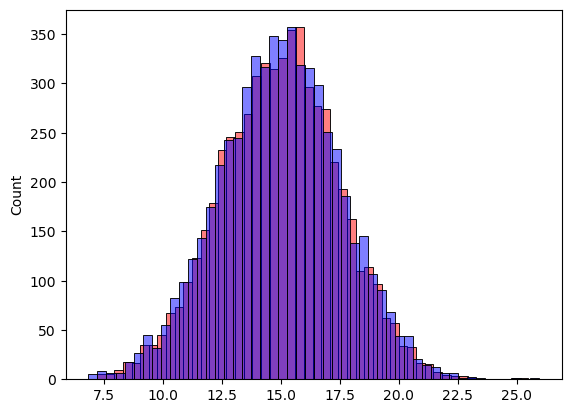

In [20]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [21]:
rmse(y_train, y_pred)
# fillna = .52 RMSE

np.float64(0.5202614265099076)

Question 3 - Average

In [22]:
y_train.mean()
# average fuel_efficency_mpg = 14.95449932853275

np.float64(14.95449932853275)

In [23]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight']
df_train['age'] = 2023 - df_train['model_year']
features = base + ['age']
X_train = df_train[features]
X_train = df_train[features].fillna(14.95449932853275).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)
y_pred

array([17.3335061 , 16.28917245, 17.70233961, ..., 17.54720542,
       18.78642495, 17.86805137], shape=(5824,))

<Axes: ylabel='Count'>

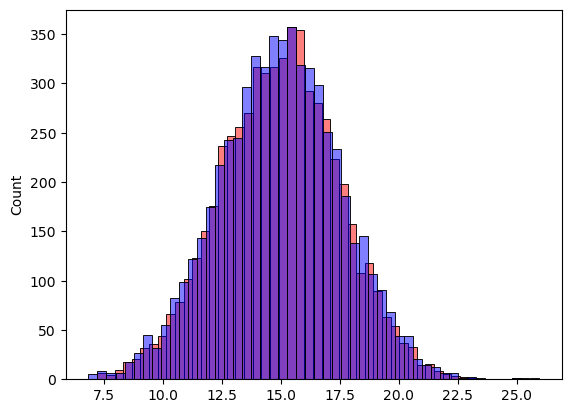

In [24]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [25]:
rmse(y_train, y_pred).round(2)
# both are equally good

np.float64(0.52)

Question 4

In [26]:
def train_linear_regression_reg(X, y, r=0.001): 
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [27]:
def prepare_X(df):
    df = df.copy() # create copy to retain original dataframe
    
    df['age'] = 2023 - df['model_year'] # create new feature
    features = base + ['age'] # adds feature to base feature already used
    
    df_num = df[features]# extracts the selected features from the df
    df_num = df_num.fillna(0) # fill in values with 0
    X = df_num.values # create matrix with values from the dataframe
    
    return X

In [28]:
df_val

,engine_displacement,horsepower,vehicle_weight,model_year
0,180,112.0,2772.134410,2020
1,260,138.0,3014.061530,2022
2,140,181.0,3652.186151,2016
3,270,105.0,2753.040847,2023
4,170,224.0,4163.375137,2003
...,...,...,...,...
1935,290,205.0,3403.401496,2019
1936,200,159.0,2752.516039,2009
1937,230,202.0,3303.000688,2008
1938,220,169.0,3293.420251,2008


In [29]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
   
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score.round(2))
# best option is 0

0 29.521240048583582 0.52
0.01 29.51790212085986 0.52
0.1 29.487894704729683 0.52
1 29.191142384447293 0.52
5 27.941413487866033 0.55
10 26.52208889508044 0.64
100 13.854575685755751 2.06


Question 5

In [30]:
idx = np.arange(n)
np.random.seed(0)
np.random.shuffle(idx)

df_train = efficiency.iloc[idx[:n_train]]
df_val = efficiency.iloc[idx[n_train:n_train+n_val]]
df_test = efficiency.iloc[idx[n_train+n_val:]]

In [31]:
# make open list, send training flow through for
# loop adding 1 each time 
std_list = []
i=0
for i in range(0,10):
    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)

    df_train = efficiency.iloc[idx[:n_train]]
    df_val = efficiency.iloc[idx[n_train:n_train+n_val]]
    df_test = efficiency.iloc[idx[n_train+n_val:]]
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    std_list.append(score)
    i=+1
stds = np.array(std_list)
np.std(stds)
print(stds), print(np.std(stds))
# .006989std

[0.52065313 0.52133889 0.522807   0.51595167 0.51091295 0.52834065
 0.53139107 0.50906704 0.51473991 0.51318659]
0.006989446427775785


(None, None)

Question 6

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

efficiency = pd.read_csv('car_fuel_efficiency.csv')
efficiency = efficiency[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
efficiency.head()
n = len(efficiency)

n_val = int(n * 0.2) # number should be whole number(int)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_test, n_train, n_val

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = efficiency.iloc[idx[:n_train]]
df_val = efficiency.iloc[idx[n_train:n_train+n_val]]
df_test = efficiency.iloc[idx[n_train+n_val:]]
len(df_test), len(df_train), len(df_val)

full_xtrain = pd.concat([df_train, df_val]).reset_index(drop=True)
len(full_xtrain)

full_ytrain = pd.concat([df_train.fuel_efficiency_mpg
                         ,df_val.fuel_efficiency_mpg]).reset_index(drop=True).values
y_test = df_test.fuel_efficiency_mpg.values
len(full_ytrain)

def prepare_X(df):
    df = df.copy() # create copy to retain original dataframe
    base = ['engine_displacement', 'horsepower', 'vehicle_weight']

    df['age'] = 2023 - df['model_year'] # create new feature
    features = base + ['age'] # adds feature to base feature already used
    
    df_num = df[features]# extracts the selected features from the df
    df_num = df_num.fillna(0) # fill in values with 0
    X = df_num.values # create matrix with values from the dataframe
    
    return X

def train_linear_regression_reg(X, y, r=0.001): 
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2 # finding difference of squared values 
    mse = se.mean() # finding the average difference of squared values
    return np.sqrt(mse) #returns the square root of the average 
# differnce of the squared values

X_train_full = prepare_X(full_xtrain)
w0, w = train_linear_regression_reg(X_train_full, full_ytrain, r=0.001)
   
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score.round(3)



np.float64(0.516)